In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pywaffle import Waffle
import chart_studio.plotly as py

In [2]:
df = pd.read_csv('../data/SummerStudentAdmissions2.csv')
df

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
...,...,...,...,...,...,...,...,...
83,Waitlist,Vermont,3.53,3.3,862.0,85,1.0,1
84,Waitlist,Florida,3.52,0.7,868.0,81,0.0,4
85,Waitlist,Florida,3.51,3.4,865.0,88,1.0,3
86,Waitlist,California,3.47,2.2,867.0,77,1.0,5


## Check missing values. 

Decision, GPA, TestScore, Gender have missing values.

In [3]:
df.isnull().sum()

Decision          1
State             0
GPA               1
WorkExp           0
TestScore         1
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [4]:
df.iloc[5]

Decision                 NaN
State             California
GPA                      3.8
WorkExp                  1.2
TestScore                NaN
WritingScore              95
Gender                   0.0
VolunteerLevel             4
Name: 5, dtype: object

Fill quantitative columns with the mean and fill qualitative columns with mode.

In [5]:
df['Decision'].fillna(df['Decision'].mode()[0], inplace=True)
df['GPA'].fillna(df['GPA'].mean(), inplace=True)
df['TestScore'].fillna(df['TestScore'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [6]:
df.iloc[5]

Decision               Admit
State             California
GPA                      3.8
WorkExp                  1.2
TestScore         875.689655
WritingScore              95
Gender                   0.0
VolunteerLevel             4
Name: 5, dtype: object

In [7]:
df.isnull().sum()

Decision          0
State             0
GPA               0
WorkExp           0
TestScore         0
WritingScore      0
Gender            0
VolunteerLevel    0
dtype: int64

## Check error values

### Decision

In [8]:
df['Decision'].unique()

array(['Admit', 'Banana', 'Decline', 'Waitlist'], dtype=object)

The applicant who get Banana for the decision has very good GPA, TestScore, Writing Score. Thus, we think it should be admitted.

In [9]:
df[df['Decision'] == 'Banana']

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
2,Banana,California,3.8,2.3,970.0,98,0.0,5


In [10]:
df.replace('Banana', 'Admit', inplace=True)

In [11]:
df['Decision'].unique()

array(['Admit', 'Decline', 'Waitlist'], dtype=object)

### State

In [12]:
df['State'].unique()

array(['California', 'Florida', 'Colorado', 'Utah', 'Oregon', 'Virginia',
       'virginia', 'mississippi', 'New York', 'Alabama', 'Georgia',
       'Vermont'], dtype=object)

In [13]:
df.replace('virginia', 'Virginia', inplace=True)
df.replace('mississippi', 'Mississippi', inplace=True)

In [14]:
df['State'].unique()

array(['California', 'Florida', 'Colorado', 'Utah', 'Oregon', 'Virginia',
       'Mississippi', 'New York', 'Alabama', 'Georgia', 'Vermont'],
      dtype=object)

### GPA

In [15]:
df[(df['GPA'] < 0) | (df['GPA'] > 4)]

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
21,Admit,Colorado,6.0,0.8,969.0,93,1.0,1


In [16]:
df.loc[21, 'GPA'] = df['GPA'].mean()

In [17]:
df.loc[21]

Decision             Admit
State             Colorado
GPA                3.54046
WorkExp                0.8
TestScore            969.0
WritingScore            93
Gender                 1.0
VolunteerLevel           1
Name: 21, dtype: object

In [18]:
df[(df['GPA'] < 0) | (df['GPA'] > 4)]

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel


### WorkExp

In [19]:
df[(df['WorkExp'] < 0) | (df['WorkExp'] > 10)]

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
68,Waitlist,Georgia,3.56,100.0,866.0,89,0.0,1


In [20]:
df.loc[68, 'WorkExp'] = df['WorkExp'].mean()

In [21]:
df.loc[68]

Decision          Waitlist
State              Georgia
GPA                   3.56
WorkExp           3.210227
TestScore            866.0
WritingScore            89
Gender                 0.0
VolunteerLevel           1
Name: 68, dtype: object

### TestScore

In [22]:
df[(df['TestScore'] < 0) | (df['TestScore'] > 1000)]

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel


### WritingScore

In [23]:
df[(df['WritingScore'] < 0) | (df['WritingScore'] > 100)]

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel


### Gender

In [24]:
df['Gender'].unique()

array([ 1.,  0., -1.])

In [25]:
df[df['Gender'] == -1]

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3


In [26]:
df.loc[4, 'Gender'] = df['Gender'].mode()[0]

In [27]:
df['Gender'].unique()

array([1., 0.])

### VolunteerLevel

In [28]:
df['VolunteerLevel'].unique()

array([0, 4, 5, 2, 3, 1], dtype=int64)

In [29]:
df.head()

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Admit,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,1.0,3


In [30]:
df.groupby('Decision')['VolunteerLevel'].value_counts(normalize=True)

Decision  VolunteerLevel
Admit     2                 0.200000
          0                 0.171429
          1                 0.171429
          4                 0.171429
          3                 0.142857
          5                 0.142857
Decline   1                 0.250000
          4                 0.250000
          2                 0.142857
          5                 0.142857
          0                 0.107143
          3                 0.107143
Waitlist  1                 0.200000
          3                 0.200000
          2                 0.160000
          4                 0.160000
          5                 0.160000
          0                 0.120000
Name: VolunteerLevel, dtype: float64

In [31]:
df_volunteer = df.groupby(['Decision'])['VolunteerLevel'].value_counts()
df_volunteer = df_volunteer.rename('Count').reset_index().sort_values(by=['Decision', 'VolunteerLevel'])
df_volunteer.rename(columns={'VolunteerLevel': 'Volunteer Level'}, inplace=True)
df_volunteer

,Decision,Volunteer Level,Count
1,Admit,0,6
2,Admit,1,6
0,Admit,2,7
4,Admit,3,5
3,Admit,4,6
5,Admit,5,5
10,Decline,0,3
6,Decline,1,7
8,Decline,2,4
11,Decline,3,3


In [32]:
fig1 = px.bar(df_volunteer, x='Volunteer Level', y='Count', color='Decision', barmode='group', text='Count', title='Number of Volunteer Levels by Admission Decision')
fig1.update_layout(title_font_family="Times New Roman", title_font_size=24, legend_font_size=14, title_x=0.5)
#fig1.write_html("../plots/volunteer_level.html")
py.iplot(fig1)

In [33]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type":"box"}, {"type":"box"}],],
                    column_widths=[0.5, 0.5],
                    vertical_spacing = 0.13,
                    subplot_titles=("Distribution of GPA by Admission", "Distribution of Test Score by Admission"))

fig.add_trace(go.Box(y=df[df["Decision"] == "Admit"]["GPA"], name="Admit"), row=1, col=1)
fig.add_trace(go.Box(y=df[df["Decision"] == "Waitlist"]["GPA"], name="Waitlist"), row=1, col=1)
fig.add_trace(go.Box(y=df[df["Decision"] == "Decline"]["GPA"], name="Decline"), row=1, col=1)
fig.add_trace(go.Box(y=df[df["Decision"] == "Admit"]["TestScore"], name="Admit"), row=1, col=2)
fig.add_trace(go.Box(y=df[df["Decision"] == "Waitlist"]["TestScore"], name="Waitlist"), row=1, col=2)
fig.add_trace(go.Box(y=df[df["Decision"] == "Decline"]["TestScore"], name="Decline"), row=1, col=2)

fig.update_xaxes(title_text="Admission Decision", row=1, col=1)
fig.update_yaxes(title_text="GPA", row=1, col=1)
fig.update_xaxes(title_text="Admission Decision", row=1, col=2)
fig.update_yaxes(title_text="Test Score", row=1, col=2)
fig.update_layout(title="Distribution of GPA and Test Score by Admission", title_x=0.5, font_size=15)
fig.update_annotations(font=dict(size=18))
#fig.write_html("../plots/gpa_test.html")
py.iplot(fig)

In [34]:
fig_writing = go.Figure()
fig_writing.add_trace(go.Box(y=df[df["Decision"] == "Admit"]["WritingScore"], name="Admit"))
fig_writing.add_trace(go.Box(y=df[df["Decision"] == "Waitlist"]["WritingScore"], name="Waitlist"))
fig_writing.add_trace(go.Box(y=df[df["Decision"] == "Decline"]["WritingScore"], name="Decline"))
fig_writing.update_xaxes(title_text="Admission Decision")
fig_writing.update_yaxes(title_text="Writing Score")
fig_writing.update_layout(title="Distribution of Writing Score by Admission", title_x=0.5, font_size=15)
#fig_writing.write_html("../plots/writing.html")
py.iplot(fig_writing)

How state & Work Expereince influence admission decision

In [35]:
df['State']

0     California
1        Florida
2     California
3       Colorado
4       Colorado
         ...    
83       Vermont
84       Florida
85       Florida
86    California
87       Florida
Name: State, Length: 88, dtype: object

In [36]:
df['Decision']

0        Admit
1        Admit
2        Admit
3        Admit
4        Admit
        ...   
83    Waitlist
84    Waitlist
85    Waitlist
86    Waitlist
87    Waitlist
Name: Decision, Length: 88, dtype: object

In [37]:
# percentage of people admitted in each state
state_with_decision = pd.DataFrame(df.groupby('State')['Decision'].value_counts(normalize=True)).rename(columns={'Decision':'pct_admitted'}).reset_index().round(2)
state_with_decision.rename(columns={"pct_admitted": "Percentage"}, inplace=True)
state_with_decision

,State,Decision,Percentage
0,Alabama,Waitlist,1.00
1,California,Admit,0.75
2,California,Waitlist,0.19
3,California,Decline,0.06
4,Colorado,Admit,0.50
5,Colorado,Decline,0.30
6,Colorado,Waitlist,0.20
7,Florida,Decline,0.36
8,Florida,Admit,0.33
9,Florida,Waitlist,0.31


In [38]:
fig_state = px.bar(state_with_decision, x='State', y='Percentage', color='Decision', barmode='group', text='Percentage', title="Percentage of Students Admitted, Declined or in Waitlist for Each State.")
fig_state.update_layout(title_font_family="Times New Roman", title_font_size=24, legend_font_size=14, title_x=0.5)
#fig_state.write_html("../plots/state.html")
py.iplot(fig_state)

From the plot above, we can visualize that california has the highest number of student acceptances while Mississipi has the lowest. It is worth mentioning that in some students from New York, Georgia, Vermont, Oregon and etc only have one student that applied to college therefore some students were either rejected or waitlisted.


In [39]:
df.columns

Index(['Decision', 'State', 'GPA', 'WorkExp', 'TestScore', 'WritingScore',
       'Gender', 'VolunteerLevel'],
      dtype='object')

In [40]:
grp_state_decision =  df.groupby(["State", "Decision"])["WorkExp"].mean().reset_index()
grp_state_decision["WorkExp"] = grp_state_decision["WorkExp"].apply(lambda x: round(x,2))
grp_state_decision.rename(columns={"WorkExp": "Work Experience"}, inplace=True)
grp_state_decision

,State,Decision,Work Experience
0,Alabama,Waitlist,1.20
1,California,Admit,2.86
2,California,Decline,0.80
3,California,Waitlist,1.87
4,Colorado,Admit,1.46
5,Colorado,Decline,2.18
6,Colorado,Waitlist,1.88
7,Florida,Admit,1.60
8,Florida,Decline,2.22
9,Florida,Waitlist,2.52


In [41]:
fig_workexp = px.bar(grp_state_decision, x='State', y='Work Experience', color='Decision', barmode='group', text='Work Experience', title='Student Work Experience by State and Admission Decision')
fig_workexp.update_layout(title_font_family="Times New Roman", title_font_size=24, legend_font_size=14,title_x=0.5)
#fig_workexp.write_html("../plots/workexp.html")
py.iplot(fig_workexp)

This plot shows how an applicant's work experience and state can influence their admission decision. As seen in the plot, some states such as California have more applicants than other states due to the lack of applicants from certain states. By analyzing the admitted students, we can observe that students from California with 2.86 years of work experience were accepted followed up by Florida whose students had 1.6 years of work expereince, colorado students who had 1.46 years of work experience, and finally Utah students with 1.2 years of worth of experience. 
For waitlisted students, applicants from Florida with 2.52 years of work experience are waitlisted followed up with students from California and Colorado with nearly 1.88 years of work experience and Utah with 1.37 years of experience.

To conclude, We can't say that a person with more work experience has a higher chance of getting admitted. Multiple factors are taken before a student gets admitted. For example, a student from Mississippi who has 6.2 years of work experience was rejected but this could be the applicant not satisfying other criterias such as GPA/Test score.

In [42]:
df.groupby("State")["GPA"].mean()

State
Alabama        3.410000
California     3.610654
Colorado       3.493523
Florida        3.565833
Georgia        3.560000
Mississippi    2.910000
New York       3.550000
Oregon         2.900000
Utah           3.443333
Vermont        3.530000
Virginia       3.142500
Name: GPA, dtype: float64

In [43]:
df.groupby("State")["WorkExp"].mean()

State
Alabama        1.200000
California     2.543750
Colorado       1.760000
Florida        2.105556
Georgia        3.210227
Mississippi    6.200000
New York       2.200000
Oregon         0.900000
Utah           1.250000
Vermont        3.300000
Virginia       2.375000
Name: WorkExp, dtype: float64

### Gender Insights

In [44]:
def to_category(gender):
    if gender == 0:
        return '0'
    elif gender == 1:
        return 1
df.Gender = df.Gender.apply(lambda x: to_category(x))

df

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1,0
1,Admit,Florida,3.80,1.4,969.0,97,1,4
2,Admit,California,3.80,2.3,970.0,98,0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0,2
4,Admit,Colorado,3.92,1.2,969.0,95,1,3
...,...,...,...,...,...,...,...,...
83,Waitlist,Vermont,3.53,3.3,862.0,85,1,1
84,Waitlist,Florida,3.52,0.7,868.0,81,0,4
85,Waitlist,Florida,3.51,3.4,865.0,88,1,3
86,Waitlist,California,3.47,2.2,867.0,77,1,5


In [45]:
df_gender=df.groupby(['Decision'])['Gender'].value_counts()
df_gender

Decision  Gender
Admit     1         20
          0         15
Decline   1         16
          0         12
Waitlist  1         14
          0         11
Name: Gender, dtype: int64

In [46]:
df_gender = df_gender.rename('Count').reset_index().sort_values(by=['Decision', 'Gender'])
df_gender

,Decision,Gender,Count
0,Admit,1,20
1,Admit,0,15
2,Decline,1,16
3,Decline,0,12
4,Waitlist,1,14
5,Waitlist,0,11


In [47]:
fig_gender = px.bar(df_gender, x='Decision', y='Count', color='Gender', barmode='group', text='Count', title='Count of Students for Each Decision by Gender',
                    color_discrete_map={
                    1: 'lightblue',
                    '0': 'pink'}
                    )
fig_gender.update_layout(title_font_family="Times New Roman", title_font_size=24, legend_font_size=14,title_x=0.5)
#fig_gender.write_html("../plots/fig_gender.html")
py.iplot(fig_gender)

From the above plot, we see that for every decision category, the number of males(i.e. considering code 1 as male and other as females) is higher. Therefore, we can conclude that overall the applicants pool contained a majority of male students. We can also see that gender- 1 is 33% more of the gender-0 in decision categories 'ADMIT' and 'DECLINE' which means that a gender of a person is not necessary influencing in decision.

In [48]:
df_state_gender=df.groupby(['State'])['Gender'].value_counts()
df_state_gender

State        Gender
Alabama      0          1
California   1         10
             0          6
Colorado     1         11
             0          9
Florida      1         19
             0         17
Georgia      0          1
Mississippi  1          1
New York     1          1
Oregon       1          1
Utah         1          4
             0          2
Vermont      1          1
Virginia     1          2
             0          2
Name: Gender, dtype: int64

In [49]:
df_state_gender = df_state_gender.rename('Count').reset_index().sort_values(by=['Gender', 'State'])
df_state_gender

,State,Gender,Count
1,California,1,10
3,Colorado,1,11
5,Florida,1,19
8,Mississippi,1,1
9,New York,1,1
10,Oregon,1,1
11,Utah,1,4
13,Vermont,1,1
14,Virginia,1,2
0,Alabama,0,1


In [50]:
fig_state_gender = px.bar(df_state_gender, x='State', y='Count', color='Gender', barmode='group', text='Count', title='Count of Students for Each State by Gender',
                          color_discrete_map={
                    1: 'lightblue',
                    '0': 'pink'})
fig_state_gender.update_layout(title_font_family="Times New Roman", title_font_size=24, legend_font_size=14,title_x=0.5)
#fig_state_gender.write_html("../plots/fig_state_gender.html")
py.iplot(fig_state_gender)

We see the distribituion of gender among different states. Florida leads the count followed by Colorado and California. Most of the other states just had 1 applicant with the exception of Utah and Virginia 

In [51]:
# import matplotlib.pyplot as plt
# import numpy as np

# df_admits = df[df['Decision'].str.contains('Admit')]
# df_admits
# #create scatter plot
# plt.scatter(df_admits.WorkExp,df_admits.GPA)

# #add horizontal line at mean value of y
# plt.axhline(y=np.nanmean(df_admits.GPA), color='red', linestyle='--', linewidth=3, label='Avg')
# plt.xlabel("GPA")
# plt.ylabel("Work Experience")
# plt.title("GPA v/s Work Experience ")
# plt.show()

In [52]:
df_decline = df[df['Decision'].str.contains('Decline')]
df_decline
scatter=px.scatter(data_frame = df_decline
           ,x = 'GPA'
           ,y = 'WorkExp',
           title= 'GPA vs Work Experience for DECLINE'
           ,opacity = 1,
           trendline='ols'
           )
scatter.update_layout(title_font_family="Times New Roman", title_font_size=24, legend_font_size=14,title_x=0.5)
##scatter.write_html("../plots/scatter.html")
py.iplot(scatter)

# Correlation plot between GPA and Work experience for Declined Candidates

The trend line shows that there is a slight negative correlation between Work experience and GPA of candidates that got declined. Therefore, the higher the GPA is, the lower is the work experience. To summarize, an applicant who has a higher gpa doesn’t necessarily have a higher chance of acceptance as multiple factors are considered before an applicant is accepted


# SQUARED AREA PLOT

In [53]:
df.Decision.value_counts()

Admit       35
Decline     28
Waitlist    25
Name: Decision, dtype: int64

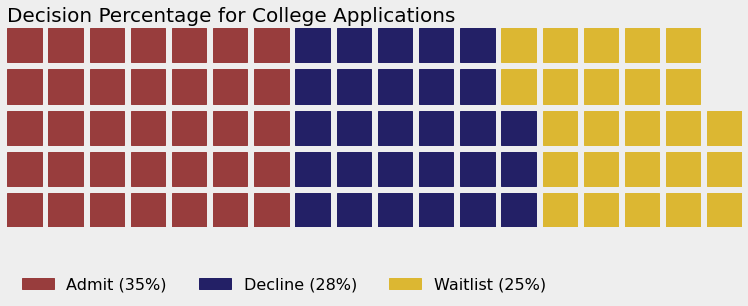

In [54]:
data = {'Admit': 35, 'Decline': 28, 'Waitlist': 25}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Decision Percentage for College Applications', 'loc': 'left', 'fontsize':20},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0, 'fontsize':16},
    figsize=(10.5, 8)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
#plt.savefig("../plots/decision_percentage.png")
plt.show()

The above Square area plot describes the proportion of the acceptance, decline and waitlisted candidates. We can see that Admit rate was 35% where as the percentage for decline and waitlist was nearly the same.

# Conclusion

From the overall analysis, we can conclude that volunteer levels does not have much significance in application decisions. The spread for GPA for students who got declined is wide however, the test-score spread of students who got accepted is towards the higher end which means test score is given preference above GPA. There is a negative correlation between GPA and Work experience and so it is better to encourage students to gain more work experience along with focusing on maintaining GPA and thus the curriculum should maybe be adjusted. We see that mostly several states had just 1 student applying whereas the majority of students application came from Floride, Colorado and California. It is important to diversify the student body andpromote the university by visiting college fairs as well as using social media to advertise. Finally, we see that there is not much difference between the proportions of the students who got declined and the ones who got waitlisted, therefore, the university should consider on accepting more students and reducing their waitlist. 